<a href="https://colab.research.google.com/github/Dimitri11230/Research-project--Modelling-Covid19-in-Trinidad-and-Tobago/blob/main/Odeprojmeshgrid2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing actual data for infected 


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
data=np.loadtxt("actualdraft2.txt",skiprows=1, usecols=np.arange(0,4))

actualactive =data[0:,3]
actualactive=np.array(actualactive)
print(actualactive)
actualactive.shape


[  29.   33.   39.   39.   51.   56.   67.   82.  132.  133.  134.  148.
  179.  257.  265.  324.  401.  401.  477.  534.  593.  687.  752.  828.
  906. 1045. 1204.  833.  641.  954.  986. 1052. 1079. 1192. 1248. 1292.
 1473. 1482. 1497. 1603. 1794. 1893. 2009. 2170. 2202. 2288. 2357. 1800.
 1788. 1896. 2039. 2034. 2009. 2001. 2022. 2046. 2022. 2008. 2016. 1860.
 1829. 1826. 1765. 1751. 1788. 1798. 1734. 1753. 1727. 1727. 1711. 1732.
 1708. 1657. 1582. 1559. 1556. 1562. 1534. 1505. 1443. 1413. 1415. 1398.
 1365. 1313. 1280. 1243. 1216. 1194. 1074.  951.  798.]


(93,)

This is where we learn parameters for the model
Using days 0 to 25






In [ ]:
def getsusceptible(x):
  # Total population, N.
  N = 1400000
  # Initial number of infected and recovered individuals, I0 and R0.
  I0, R0 = 33, 140
  # Everyone else, S0, is susceptible to infection initially.
  S0 = N - I0 - R0
  # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
  beta, gamma = x[0], x[1]
  # A grid of time points (in days)
  t = np.linspace(0, 25, 25)

  # The SIR model differential equations.
  def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

  # Initial conditions vector
  y0 = S0, I0, R0
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta, gamma))
  S, I, R = ret.T
  I=np.array(I)
  actualactiveslice =actualactive[0:25]
  actualactiveslice=np.array(actualactiveslice)
  difference = actualactiveslice-I
  difference=np.absolute(difference)
  summ =np.sum(difference) #try l2 norm
  return summ


from scipy import optimize 

optimize.brute(getsusceptible, ((0,2),(0.025,0.1)),Ns=100,finish=None) #play with these  (0,1), (0.025,0.1) and change 3d plots as necessary
#optimize.brute(getsusceptible, ((0,1),(0,1)),Ns=100)
#optimize.brute(getsusceptible, ((0,1),(0,1)),Ns=100,finish="None")
#optimize.minimize(getsusceptible,[1.5,1.5],method="CG")


array([0.22222222, 0.08560606])

Let us see the 3d plot to see learned parameters

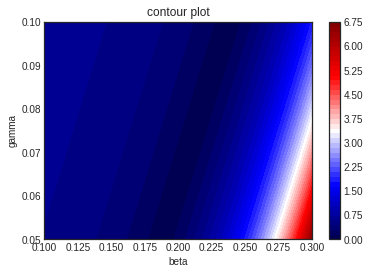

In [ ]:
plt.style.use('seaborn-white')


def getpenalty(beta,gamma):
  # Total population, N.
  N = 1400000
  # Initial number of infected and recovered individuals, I0 and R0.
  I0, R0 = 33, 140
  # Everyone else, S0, is susceptible to infection initially.
  S0 = N - I0 - R0
  # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
  
  # A grid of time points (in days)
  t = np.linspace(0, 25, 25)

  # The SIR model differential equations.
  def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

  # Initial conditions vector
  y0 = S0, I0, R0
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta, gamma))
  S, I, R = ret.T
  I=np.array(I)
  actualactiveslice =actualactive[0:25]
  actualactiveslice=np.array(actualactiveslice)
  difference = actualactiveslice-I
  difference=np.absolute(difference)
  summ =np.sum(difference) #try l2 norm
  return summ


#x = np.linspace(1.5, 1.8,50)   #use these for demonstration!!!!!!!!!!!!!!!!!!!!
#y = np.linspace(1.5, 1.7, 50)
x = np.linspace(0.1, 0.3,50) 
y = np.linspace(0.05, 0.1, 50)
Z=np.zeros((50,50))

X, Y = np.meshgrid(x, y)
for i in range(0,50):
  for j in range(0,50):
    Z[j][i]=getpenalty(x[i],y[j])
Z=Z/10000.0
plt.title("contour plot")
plt.xlabel("beta")
plt.ylabel("gamma")
plt.contourf(X, Y, Z, 50, cmap='seismic')
plt.colorbar();




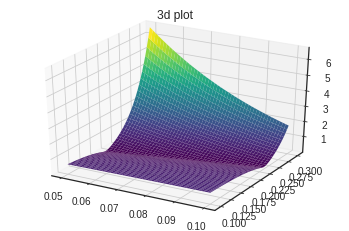

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(Y, X, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('3d plot');

plotting data for learned parameters



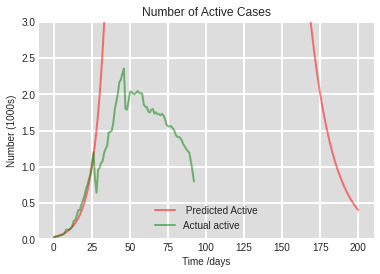

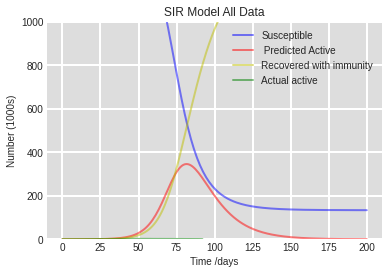

In [ ]:
# code from https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/


# Total population, N.
N = 1400000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 33, 140
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma =  0.22222222, 0.08560606
# A grid of time points (in days)
t = np.linspace(0, 200, 200)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
#ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label=' Predicted Active')
#ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(actualactive/1000, 'g', alpha=0.5, lw=2, label='Actual active')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,3)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title("Number of Active Cases")
plt.show()


#next plot
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label=' Predicted Active')
ax.plot(t, R/1000, 'y', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(actualactive/1000, 'g', alpha=0.5, lw=2, label='Actual active')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title("SIR Model All Data")
plt.show()

